In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wrangle_mvp import clean_zillow
from wrangle_mvp import boxplots, hists, split_data_continuous
import seaborn as sns

from sklearn.metrics import mean_squared_error

In [3]:
df = clean_zillow()
df

Number of observations removed: 5516


,beds,baths,area,tax_value
1,2.0,1.0,1465.0,464000.0
2,3.0,2.0,1243.0,564778.0
3,4.0,3.0,2376.0,145143.0
4,4.0,3.0,2962.0,773303.0
6,4.0,3.0,3039.0,220583.0
...,...,...,...,...
52269,3.0,2.0,1472.0,603333.0
52272,4.0,3.0,2068.0,332251.0
52274,4.0,2.0,1633.0,346534.0
52275,2.0,2.0,1286.0,354621.0


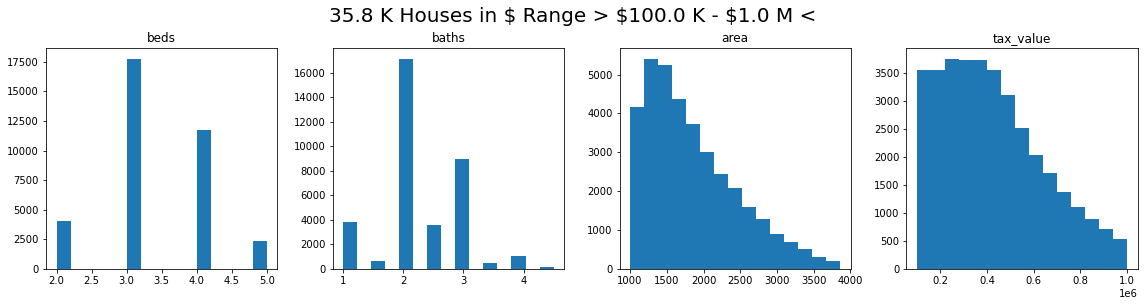

In [4]:
hists(df, granularity=15)

In [5]:
train, validate, test = split_data_continuous(df)

Prepared df: (35848, 4)

Train: (21508, 4)
Validate: (7170, 4)
Test: (7170, 4)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21508 entries, 30326 to 49470
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   beds       21508 non-null  float64
 1   baths      21508 non-null  float64
 2   area       21508 non-null  float64
 3   tax_value  21508 non-null  float64
dtypes: float64(4)
memory usage: 840.2 KB


In [7]:
train, validate, test = split_data_continuous(df, with_baseline=True)

Prepared df: (35848, 4)

Train: (21508, 4)
Validate: (7170, 4)
Test: (7170, 4)
The mean_preds had the lowest RMSE: 215859 with an in/out of: 0.999


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21508 entries, 30326 to 49470
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   beds       21508 non-null  float64
 1   baths      21508 non-null  float64
 2   area       21508 non-null  float64
 3   tax_value  21508 non-null  float64
 4   baseline   21508 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 1.5 MB


In [8]:
# baselines = ['mean_preds',
#     'median_preds',
#     'mode_preds',
#     'm_mmm_preds',
#     'hm_mmm_preds',
#     'h_m_total_preds']

In [11]:
# for i in baselines:
#     rmse_train = mean_squared_error(train.tax_value, train[i]) ** 0.5
#     rmse_validate = mean_squared_error(validate.tax_value, validate[i]) ** 0.5

#     print(f"\nRMSE using {i}\nTrain/In-Sample: ", round(rmse_train, 2), 
#           "\n\nValidate/Out-of-Sample: ", round(rmse_validate, 2)), "\n"
# train


RMSE using mean_preds
Train/In-Sample:  215859.36 

Validate/Out-of-Sample:  216106.96

RMSE using median_preds
Train/In-Sample:  218023.86 

Validate/Out-of-Sample:  218203.62

RMSE using mode_preds
Train/In-Sample:  228799.1 

Validate/Out-of-Sample:  229186.88

RMSE using m_mmm_preds
Train/In-Sample:  216384.72 

Validate/Out-of-Sample:  216664.12

RMSE using hm_mmm_preds
Train/In-Sample:  216124.46 

Validate/Out-of-Sample:  216394.79

RMSE using h_m_total_preds
Train/In-Sample:  243260.16 

Validate/Out-of-Sample:  243265.29


,beds,baths,area,tax_value,mean_preds,median_preds,mode_preds,m_mmm_preds,hm_mmm_preds,h_m_total_preds
30326,4.0,2.0,1580.0,629000.0,424146.433002,393501.0,500000.0,439215.811001,434847.777898,311984.755996
45106,3.0,1.0,1173.0,211875.0,424146.433002,393501.0,500000.0,439215.811001,434847.777898,311984.755996
43267,4.0,2.0,1725.0,271496.0,424146.433002,393501.0,500000.0,439215.811001,434847.777898,311984.755996
35226,2.0,2.5,1425.0,540465.0,424146.433002,393501.0,500000.0,439215.811001,434847.777898,311984.755996
34165,3.0,2.0,2264.0,454409.0,424146.433002,393501.0,500000.0,439215.811001,434847.777898,311984.755996
...,...,...,...,...,...,...,...,...,...,...
2136,3.0,2.0,1420.0,164070.0,424146.433002,393501.0,500000.0,439215.811001,434847.777898,311984.755996
7245,4.0,2.0,1342.0,201841.0,424146.433002,393501.0,500000.0,439215.811001,434847.777898,311984.755996
47146,4.0,2.0,3033.0,927000.0,424146.433002,393501.0,500000.0,439215.811001,434847.777898,311984.755996
24698,3.0,3.0,2280.0,143786.0,424146.433002,393501.0,500000.0,439215.811001,434847.777898,311984.755996


In [31]:
best_rmse = 1_000_000_000
best_baseline = None

for i in baselines:
    rmse_train = mean_squared_error(train.tax_value, train[i]) ** 0.5
    rmse_validate = mean_squared_error(validate.tax_value, validate[i]) ** 0.5

    if rmse_train < best_rmse:
        best_rmse = rmse_train
        best_baseline = i
        in_out = rmse_train/rmse_validate

        
train['baseline'] = round(train[best_baseline])

train = train.drop(columns= baselines)
    
print(f'The {best_baseline} had the lowest RMSE: {round(best_rmse)} with an in/out of: {round(in_out,3)}')

The mean_preds had the lowest RSME: 215859 with an in/out of: 0.999


In [9]:
train.head()

,beds,baths,area,tax_value,baseline
30326,4.0,2.0,1580.0,629000.0,424146
45106,3.0,1.0,1173.0,211875.0,424146
43267,4.0,2.0,1725.0,271496.0,424146
35226,2.0,2.5,1425.0,540465.0,424146
34165,3.0,2.0,2264.0,454409.0,424146


In [11]:
eda = train

In [24]:
round(train.tax_value.mean())

424146

In [25]:
round(train.tax_value.median())

393501

In [28]:
round(train.tax_value,-3).value_counts()

305000.0    65
382000.0    64
281000.0    58
364000.0    58
271000.0    57
            ..
990000.0     3
956000.0     2
977000.0     2
996000.0     1
933000.0     1
Name: tax_value, Length: 900, dtype: int64

In [49]:
round(train.tax_value,-3).value_counts().head(10)

305000.0    65
382000.0    64
281000.0    58
364000.0    58
271000.0    57
206000.0    56
420000.0    56
396000.0    56
244000.0    55
299000.0    53
Name: tax_value, dtype: int64

In [50]:
top_10_mode = round(train.tax_value,-3).value_counts().head(10)

In [57]:
top_10_mode.index[0]

305000.0

In [59]:
top_10_mode.values[0]

65

In [66]:
sum(top_10_mode.tolist())

578

In [67]:
65/578

0.11245674740484429

In [68]:
avg_top_10_mode = 0
total = sum(top_10_mode.tolist())
for i in range(len(top_10_mode)):
    dollars = top_10_mode.index[i] 
    weight = top_10_mode.values[i]
    avg_top_10_mode += dollars * weight / total
    
avg_top_10_mode

317697.23183391

In [ ]:
i = 0
top_10_mode.index

In [10]:
X_cols = []
for i in train.columns:
    if i not in ['tax_value', 'baseline']:
        X_cols.append(i)
y_cols = ['tax_value', 'baseline']

In [11]:
X_cols, y_cols


(['beds', 'baths', 'area'], ['tax_value', 'baseline'])